# 1.Determining inputs and outputs

In [12]:
#import pandas to read data
import pandas as pd 
data = pd.read_excel("ML dataset.xlsx")

In [13]:
#inputs
x = data[['Al', 'Ca', 'Cu', 'Zr', 'Ni', 'Nb', 'Ag', 'Mg',
       'Au', 'Zn', 'Hf', 'Ti', 'Ga', 'Co', 'Fe', 'Ta', 'Pb', 'Mo', 'In', 'Mn',
       'Sn', 'Cr', 'Pd', 'Pt', 'B', 'Bi', 'Cd', 'Ir', 'Os', 'Re', 'Rh', 'Ru',
       'V', 'W', 'Y']]
#outputs
y = data["Temperature"]

# 2.Dataset splitting

In [14]:
# Import the required libraries
# Dataset splitting
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=3)

# 3.Machine learninig

## 3.1 XGB

In [15]:
# Import the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
# Initialize the XGB model
model_xgb = XGBClassifier( n_estimators=100,
                          learning_rate=0.05,
                          max_depth=3,
                          gamma=0.1,
                          objective="softmax",
                          random_state=9999)
from sklearn.model_selection import cross_validate,KFold
# Initialize 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=33)

# Store evaluation results
precision_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
train_scores= []
test_scores =[]
  
# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(x)):    
    # Split into training and testing sets
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model_xgb.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model_xgb.predict(x_test)
    
    # Test set scoring
    test_score =  model_xgb.score(x_test, y_test)
    test_scores.append(test_score)
    # Training set scoring
    train_score = model_xgb.score(x_train, y_train)
    train_scores.append(train_score)
    # Calculating precision
    precision = precision_score(y_test, y_pred,average="macro")
    precision_scores.append(precision)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    # Calculating recall
    recall = recall_score(y_test, y_pred,average="macro")
    recall_scores.append(recall)
    # Calculating F1-score
    f1 = f1_score(y_test, y_pred,average="macro")
    f1_scores.append(f1)
    
# Output evaluation results
print(f"train_score：{train_scores}")
print(f"test_score：{test_scores}")
print(f"\nXGB-training results:\n precision:{precision_scores}")
print(f"Mean precision: {np.mean(precision_scores):.4f}")
print(f"Precision standard deviation:{np.std(precision_scores):.4f}")
print(f"\n accuracy:{accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores):.4f}")
print(f"accuracy standard deviation: {np.std(accuracy_scores):.4f}")
print(f"\n recall:{recall_scores}")
print(f"Mean recall: {np.mean(recall_scores):.4f}")
print(f"recall standard deviation: {np.std(recall_scores):.4f}")
print(f"\n F1-score:{f1_scores}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f}")
print(f"F1-score standard deviation: {np.std(f1_scores):.4f}")

train_score：[0.9642857142857143, 0.9469026548672567, 0.9734513274336283, 0.9380530973451328, 0.9380530973451328]
test_score：[0.7241379310344828, 0.6785714285714286, 0.7142857142857143, 0.6785714285714286, 0.7142857142857143]

XGB-training results:
 precision:[0.7611111111111111, 0.5833333333333334, 0.7126984126984127, 0.671957671957672, 0.6812169312169312]
Mean precision: 0.6821
Precision standard deviation:0.0584

 accuracy:[0.7241379310344828, 0.6785714285714286, 0.7142857142857143, 0.6785714285714286, 0.7142857142857143]
Mean accuracy: 0.7020
accuracy standard deviation: 0.0194

 recall:[0.7416666666666667, 0.6190476190476191, 0.6812169312169312, 0.671957671957672, 0.7047619047619048]
Mean recall: 0.6837
recall standard deviation: 0.0403

 F1-score:[0.710516536603493, 0.5777777777777778, 0.6843033509700177, 0.671957671957672, 0.6850664767331435]
Mean F1-score: 0.6659
F1-score standard deviation: 0.0458


## 3.2 KNN

In [16]:
#Import the required libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import precision_score,accuracy_score,recall_score,f1_score
# Initialize the KNN model
model_knn = KNeighborsClassifier(n_neighbors=5)#指定模型

# Initialize 5-fold cross-validation
from sklearn.model_selection import cross_validate,KFold
kf = KFold(n_splits=5, shuffle=True, random_state=33)

# Store evaluation results
precision_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
train_scores= []
test_scores =[]

# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(x)):
   
    
    # Split into training and testing sets
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model_knn.fit(x_train, y_train)
    
    # Make predictions
    y_pred = model_knn.predict(x_test)
    
    # Test set scoring
    test_score =  model_knn.score(x_test, y_test)
    test_scores.append(test_score)
    # Training set scoring
    train_score = model_knn.score(x_train, y_train)
    train_scores.append(train_score)
    # Calculating precision
    precision = precision_score(y_test, y_pred,average="macro")
    precision_scores.append(precision)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)
    # Calculating recall
    recall = recall_score(y_test, y_pred,average="macro")
    recall_scores.append(recall)
    # Calculating F1-score
    f1 = f1_score(y_test, y_pred,average="macro")
    f1_scores.append(f1)
    
# Output evaluation results
print(f"train_score：{train_scores}")
print(f"test_score：{test_scores}")
print(f"\nKNN-training results:\n precision:{precision_scores}")
print(f"Mean precision: {np.mean(precision_scores):.4f}")
print(f"precision standard deviation:{np.std(precision_scores):.4f}")
print(f"\n accuracy:{accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores):.4f}")
print(f"accuracy standard deviation: {np.std(accuracy_scores):.4f}")
print(f"\n recall:{recall_scores}")
print(f"Mean recall: {np.mean(recall_scores):.4f}")
print(f"recall standard deviation: {np.std(recall_scores):.4f}")
print(f"\n F1-score:{f1_scores}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f}")
print(f"F1-score standard deviation: {np.std(f1_scores):.4f}")

train_score：[0.7946428571428571, 0.8141592920353983, 0.7345132743362832, 0.7964601769911505, 0.7876106194690266]
test_score：[0.7241379310344828, 0.5714285714285714, 0.7857142857142857, 0.6428571428571429, 0.7857142857142857]

KNN-training results:
 precision:[0.7388888888888889, 0.4959207459207459, 0.7833333333333333, 0.6444444444444444, 0.7571428571428571]
Mean precision: 0.6839
precision standard deviation:0.1050

 accuracy:[0.7241379310344828, 0.5714285714285714, 0.7857142857142857, 0.6428571428571429, 0.7857142857142857]
Mean accuracy: 0.7020
accuracy standard deviation: 0.0837

 recall:[0.7458333333333332, 0.5476190476190476, 0.746031746031746, 0.6349206349206349, 0.7492063492063492]
Mean recall: 0.6847
recall standard deviation: 0.0812

 F1-score:[0.7285714285714286, 0.5072463768115942, 0.7538126361655774, 0.6378767431399011, 0.7504273504273504]
Mean F1-score: 0.6756
F1-score standard deviation: 0.0941


## 3.3 RF

In [17]:
# Import the required libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# Initialize the RF model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [18]:
# Parameter tuning 
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],  # number of trees
    'max_depth': [None, 5, 10],       # Maximum depth of trees
    'min_samples_split': [2, 5, 10],  # minimum samples required for splitting
    'max_features': ['sqrt', 'log2']   # maximum number of features per tree
}

# Grid search
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Determine the optimal parameters
print("Optimal parameters:", grid_search.best_params_)
best_rf = grid_search.best_estimator_

Optimal parameters: {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_split': 2, 'n_estimators': 200}


In [19]:
model_rf = RandomForestClassifier(n_estimators=200,
                                  max_depth=5,
                                  min_samples_split=2,
                                  max_features='sqrt',
                                  random_state=42)
# Initialize 5-fold cross-validation
from sklearn.model_selection import cross_validate,KFold
# Store evaluation results
precision_scores = []
accuracy_scores = []
recall_scores = []
f1_scores = []
train_scores= []
test_scores =[]

# Perform 5-fold cross-validation
for fold, (train_index, test_index) in enumerate(kf.split(x)):
    # Split into training and testing sets
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    # Train the model
    model_rf.fit(x_train, y_train)
    
    # Make predictions
    model_rf_pred = model_rf.predict(x_test)
    
    # Test set scoring
    test_score =  model_rf.score(x_test, y_test)
    test_scores.append(test_score)
    # Training set scoring
    train_score = model_rf.score(x_train, y_train)
    train_scores.append(train_score)
    # Calculating precision
    precision = precision_score(y_test, model_rf_pred,average="macro")
    precision_scores.append(precision)
    # Calculating accuracy
    accuracy = accuracy_score(y_test, model_rf_pred)
    accuracy_scores.append(accuracy)
    # Calculating recall
    recall = recall_score(y_test, model_rf_pred,average="macro")
    recall_scores.append(recall)
    # Calculating F1-score
    f1 = f1_score(y_test, model_rf_pred,average="macro")
    f1_scores.append(f1)
    
# Output evaluation results
print(f"train_score：{train_scores}")
print(f"test_score：{test_scores}")
print(f"\nRF-raining results:\n precision:{precision_scores}")
print(f"Mean precision: {np.mean(precision_scores):.4f}")
print(f"precision standard deviation:{np.std(precision_scores):.4f}")
print(f"\n accuracy:{accuracy_scores}")
print(f"Mean accuracy: {np.mean(accuracy_scores):.4f}")
print(f"accuracy standard deviation: {np.std(accuracy_scores):.4f}")
print(f"\n recall:{recall_scores}")
print(f"Mean recall: {np.mean(recall_scores):.4f}")
print(f"accuracy standard deviation: {np.std(recall_scores):.4f}")
print(f"\n F1-score:{f1_scores}")
print(f"Mean F1-score: {np.mean(f1_scores):.4f}")
print(f"F1-score standard deviation: {np.std(f1_scores):.4f}")

train_score：[0.8928571428571429, 0.911504424778761, 0.8849557522123894, 0.8849557522123894, 0.8672566371681416]
test_score：[0.6551724137931034, 0.75, 0.6785714285714286, 0.6785714285714286, 0.9285714285714286]

RF-raining results:
 precision:[0.7666666666666667, 0.8333333333333334, 0.793859649122807, 0.7555555555555555, 0.9259259259259259]
Mean precision: 0.8151
precision standard deviation:0.0616

 accuracy:[0.6551724137931034, 0.75, 0.6785714285714286, 0.6785714285714286, 0.9285714285714286]
Mean accuracy: 0.7382
accuracy standard deviation: 0.1004

 recall:[0.6333333333333333, 0.6706349206349206, 0.6560846560846562, 0.6428571428571428, 0.9555555555555556]
Mean recall: 0.7117
accuracy standard deviation: 0.1226

 F1-score:[0.6314699792960662, 0.7152777777777777, 0.5913978494623656, 0.6574398960363872, 0.9345238095238096]
Mean F1-score: 0.7060
F1-score standard deviation: 0.1211


In [20]:
# Import our data to perform predictions
data_mine = pd.read_excel("My data.xlsx")
x1 = data_mine.loc[0,'Al':'Y']
x1_df = x1.to_frame().T
y_mine_pred = model_rf.predict(x1_df)
y_mine_pred

array([0], dtype=int64)

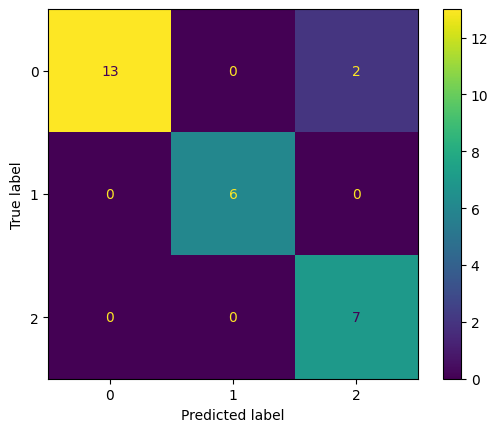

In [21]:
# Confusion matrix visualization
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(y_test,model_rf_pred)
cm_display = ConfusionMatrixDisplay(confusion_matrix=cm)
cm_display.plot()   

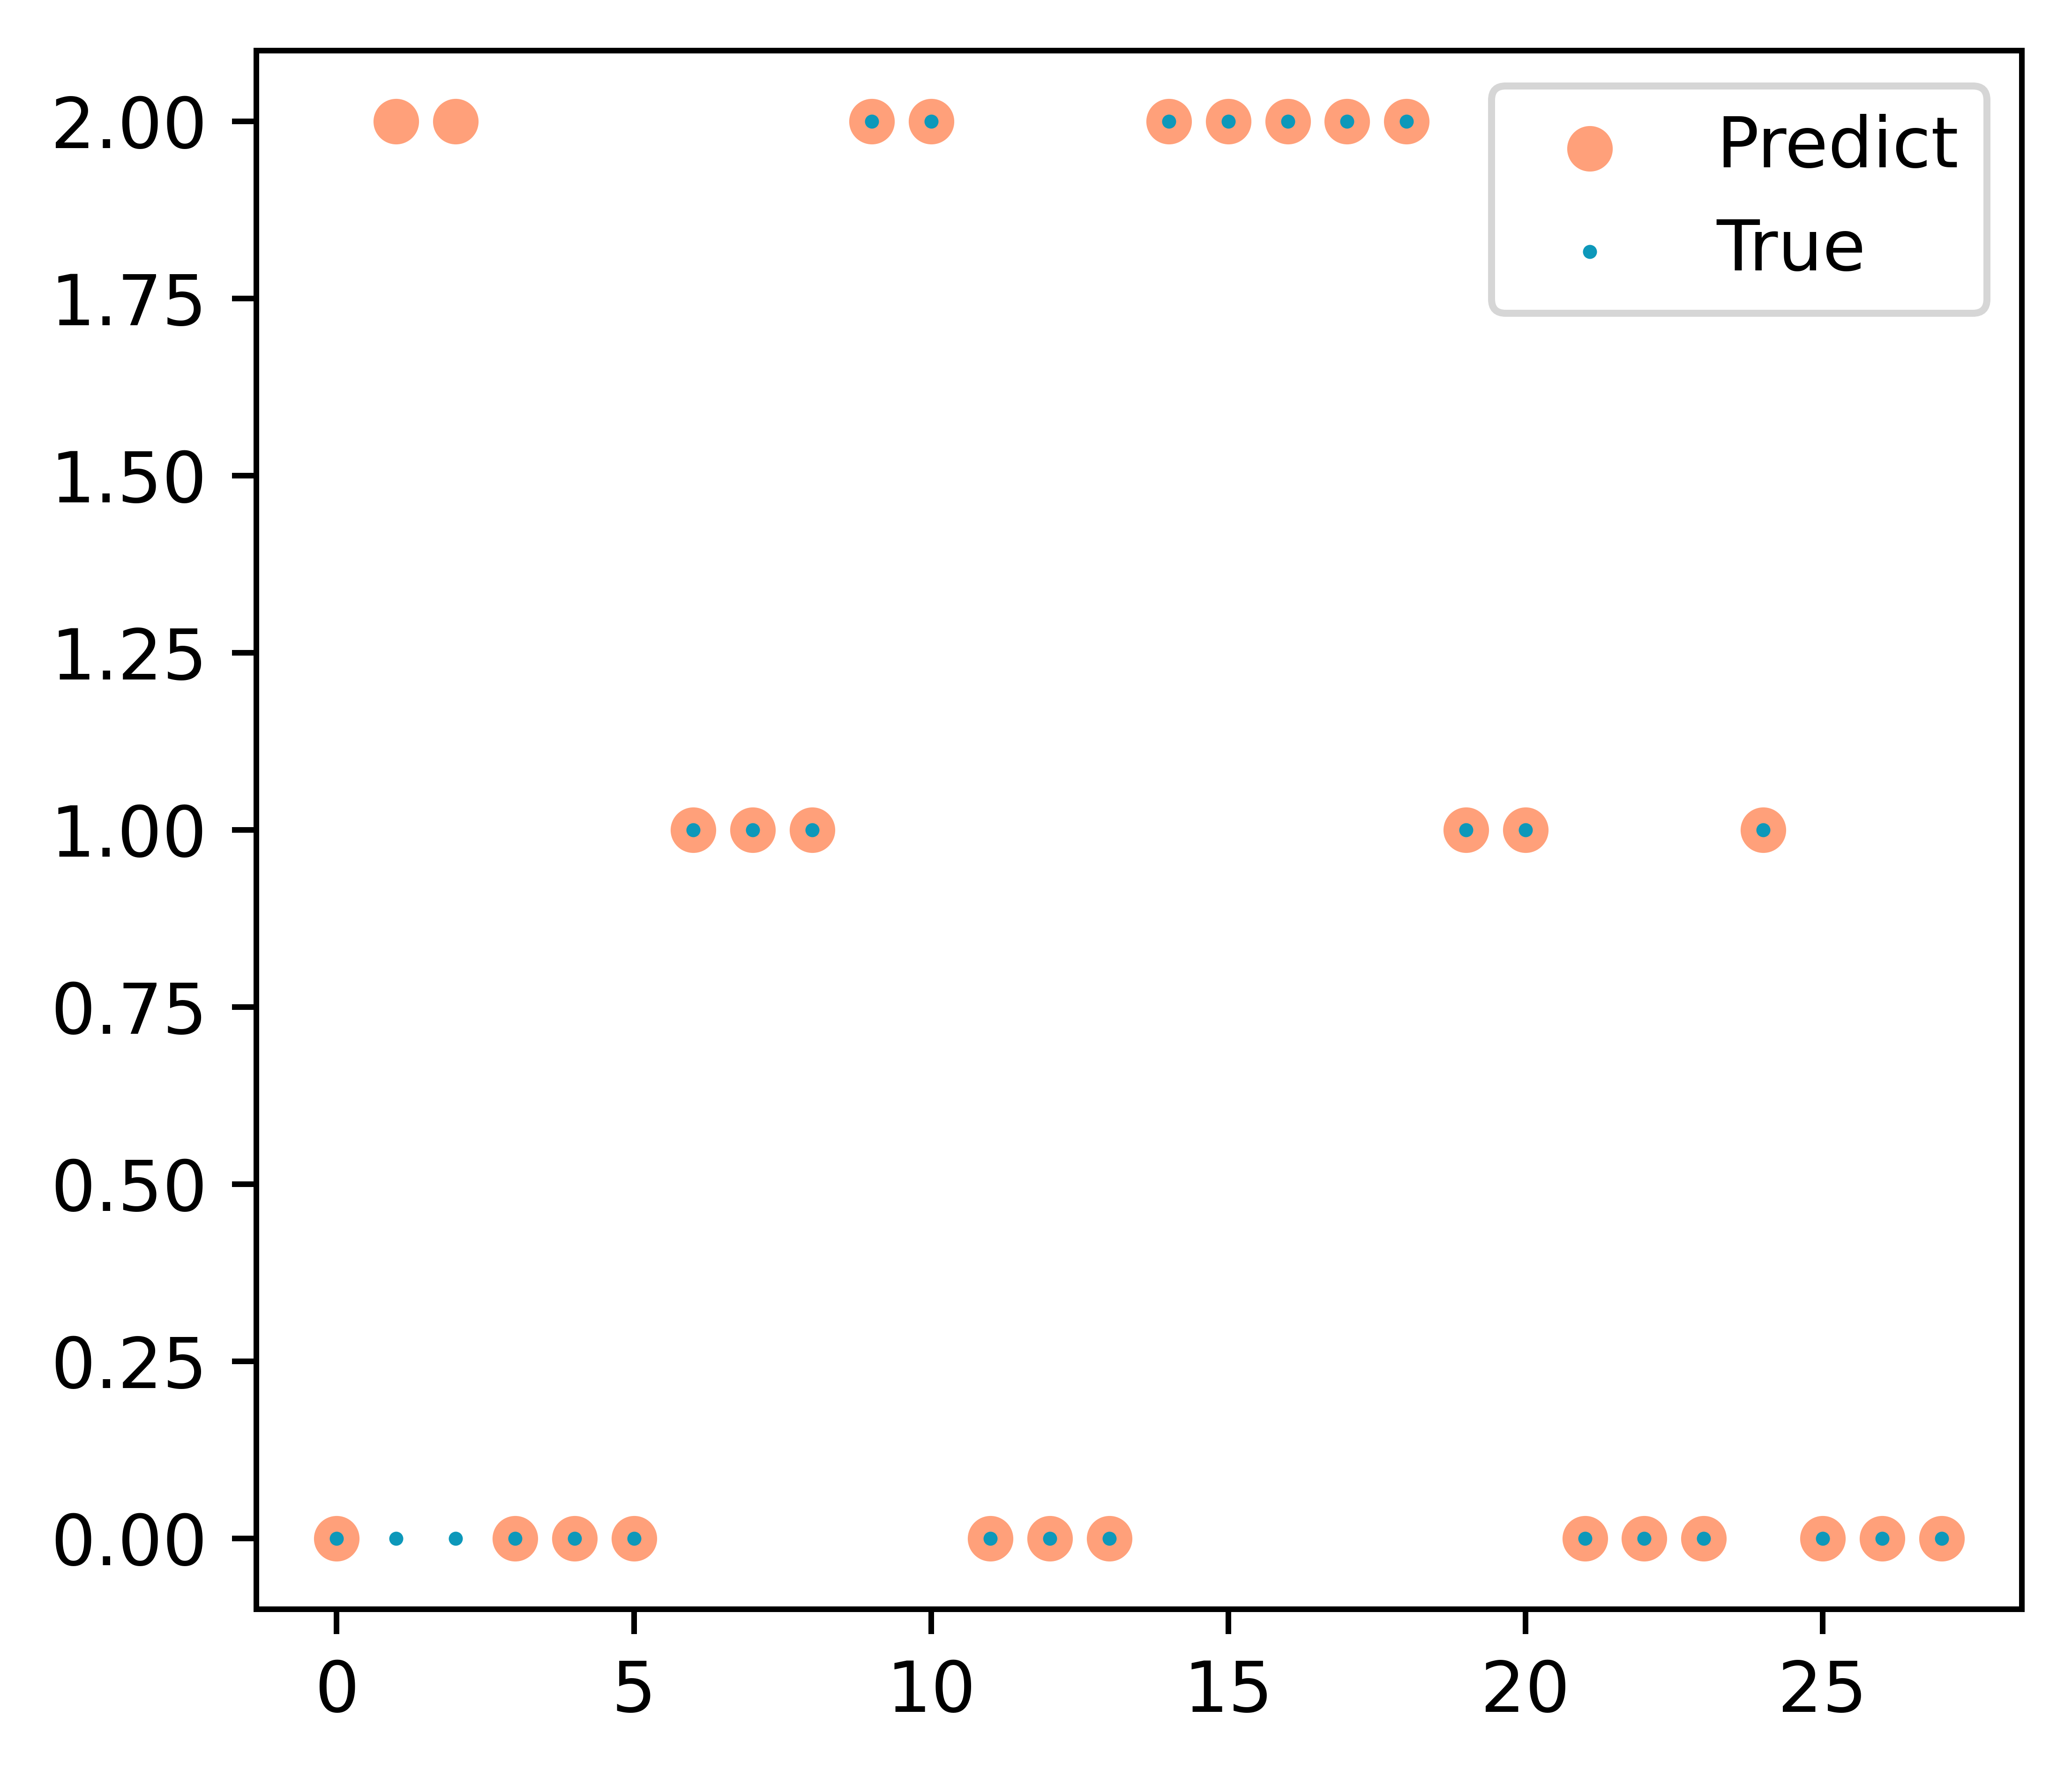

In [22]:
# Data visualization
plt.figure(figsize=(4.5,4),dpi=1080)
plt.scatter(range(0,28),model_rf_pred,c='#FFA07A',s=30,label='Predict',alpha = 1)
plt.scatter(range(0,28),y_test,c ='#0D98BA',s=1,label='True')
plt.legend()